# Exploring the Rosetta Stone of Human Capital
Based on the working paper A Rosetta Stone of Human Capital, by Dev Patel and Justin Sandefur.
Assignment by Mr. P. Louridas.

## Q1: Income and Test Results

Lets begin by importing the necessary libraries.

In [86]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats
%matplotlib inline

Reading the excel file that contains the results of the study and specifying sheet.

In [87]:

country_scores = pd.read_excel('https://www.cgdev.org/sites/default/files/patel-sandefur-human-capital-final-results.xlsx',sheet_name = 'Country Scores')

Lets see how many rows contain nan values.

In [88]:
country_scores.isna().sum()


Country                                                  0
Country Code                                             0
Percent Above Math Benchmark (400 on TIMSS Scale)        8
Percent Above Reading Benchmark (400 on PIRLS Scale)    12
Median Math Score (TIMSS Scale, 4th Grade)               7
Median Reading Score (PIRLS Scale, 4th Grade)           10
dtype: int64

Changing column names for readability. Storing the TIMSS and PIRLSS columns in a new dataframe called scores.

In [89]:
country_scores['Country Code'] = country_scores['Country Code'].astype(str)
country_scores = country_scores.rename(columns= {'2015 [YR2015]' : 'GDP'})
country_scores = country_scores.rename(columns= {"Median Math Score (TIMSS Scale, 4th Grade)": 'TIMSS'})
country_scores = country_scores.rename(columns= {"Median Reading Score (PIRLS Scale, 4th Grade)" : 'PIRLS'})
country_scores.reset_index(inplace= True, drop = True)

scores = pd.DataFrame(country_scores['Country Code'], columns = ['Country Code'])
scores['TIMSS'] = country_scores['TIMSS']
scores['PIRLS'] = country_scores['PIRLS']
scores['Country'] = country_scores['Country']



Lets import the WDI_data csv file with the income data per country.

In [90]:
incomes = pd.read_csv("Replication Files/DATA/WDI_data.csv", sep = ",", index_col = False)
incomes

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
792,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN
795,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


Removing nan values.

In [91]:

incomes = incomes.rename(columns= {'Country Name' : 'Country'})
incomes = incomes[pd.notnull(incomes['2015 [YR2015]'])]

incomes

,Country,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
787,Zambia,ZMB,"School enrollment, primary (% net)",SE.PRM.NENR,..
788,Zambia,ZMB,"School enrollment, primary (% gross)",SE.PRM.ENRR,..
789,Zimbabwe,ZWE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1912.28026439598
790,Zimbabwe,ZWE,"School enrollment, primary (% net)",SE.PRM.NENR,..


Renaming columns for readability once again, and keeping rows with series code that represents the GDP per country.

In [92]:
L = ['GDP']
s = incomes.loc[incomes['Series Name'].str.startswith(tuple(L),'Series Name')]
s = s.rename(columns= {'2015 [YR2015]' : 'GDP'})
s.reset_index(inplace = True, drop = True)

s

,Country,Country Code,Series Name,Series Code,GDP
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
2,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
3,American Samoa,ASM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
4,Andorra,AND,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
...,...,...,...,...,...
259,West Bank and Gaza,PSE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,4339.10369305975
260,World,WLD,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,14766.537605517
261,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2641.04582911357
262,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3627.20204093772


Merging the two dataframes on Country Code. The first one contains the two columns representing the PIRLS and TIMSS scores and the second dataframe contains the GDP per country.

In [93]:
result = pd.merge(scores, s[['Country Code', 'GDP']], on = 'Country Code', how = 'inner')
result

,Country Code,TIMSS,PIRLS,Country,GDP
0,ARE,437.000000,440.000000,U.A.E.,65975.3755468552
1,ARG,406.652557,431.443542,Argentina,19101.2973920688
2,ARM,454.000000,NaN,Armenia,8195.93364956571
3,AUS,520.000000,534.000000,Australia,43719.5021648696
4,AUT,511.000000,533.000000,Austria,44353.8752139122
...,...,...,...,...,...
73,TUR,477.000000,NaN,Turkey,23388.4813019367
74,URY,424.912933,450.448608,Uruguay,19831.4458942372
75,USA,544.000000,560.000000,United States,53029.2933612438
76,YEM,243.000000,NaN,Yemen,2641.04582911357


Converting GDP values to float.

In [94]:
result['GDP'] = pd.to_numeric(result['GDP'])

Passing log function to GDP column.

In [95]:
result['GDP'] = np.log(result['GDP'])


In [96]:
X = result['GDP']
y = result['PIRLS']
result.set_index('Country Code', inplace=True)

The resulting dataframe.

In [97]:
result

,TIMSS,PIRLS,Country,GDP
Country Code,,,,
ARE,437.000000,440.000000,U.A.E.,11.097037
ARG,406.652557,431.443542,Argentina,9.857512
ARM,454.000000,NaN,Armenia,9.011393
AUS,520.000000,534.000000,Australia,10.685550
AUT,511.000000,533.000000,Austria,10.699955
...,...,...,...,...
TUR,477.000000,NaN,Turkey,10.059999
URY,424.912933,450.448608,Uruguay,9.895024
USA,544.000000,560.000000,United States,10.878600


Visualizing results in ggplot for GDP and PIRLS data.

/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 10 rows containing missing values.


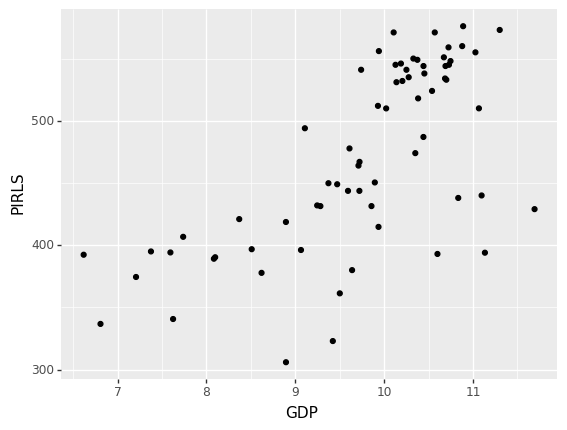

<ggplot: (8772683087765)>

In [98]:

X = result['GDP']
Y = result['PIRLS']
ggplot() + geom_point(aes(x=X, y=Y))

Visualizing results for TIMSS and GDP data.

In [99]:
p = result['GDP']
k = result['TIMSS']


/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


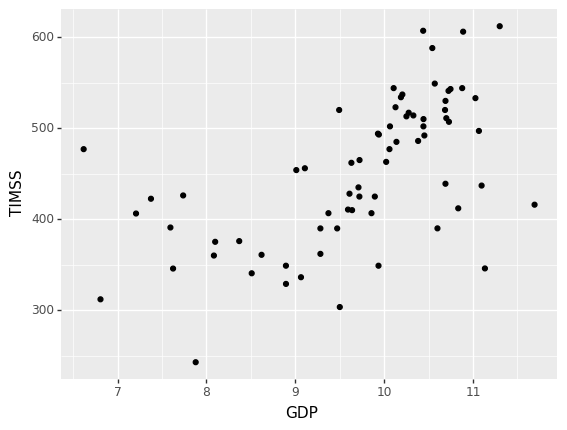

<ggplot: (8772683085281)>

In [100]:
ggplot() + geom_point(aes(x=p, y=k))

Running regression on PIRLSS scores and GDP per country.

In [101]:

mod = smf.ols("PIRLS ~ GDP", data=result)


In [102]:
pirls = mod.fit()

In [103]:
pirls.params

Intercept    42.619127
GDP          43.912415
dtype: float64

In [104]:
pirls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PIRLS   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           2.48e-10
Time:                        18:05:55   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6191     57.790      0.737      0.463     -72.762     158.000
GDP           43.9124      5.889      7.457      0.000      32.155      55.669
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Running regression on TIMSS scores and GDP per country.

In [105]:
mod2 = smf.ols("TIMSS ~ GDP", data=result)
timss = mod2.fit()
timss.params


Intercept    46.117041
GDP          41.745974
dtype: float64

In [106]:
timss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TIMSS   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           5.07e-08
Time:                        18:05:55   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1170     66.734      0.691      0.492     -87.013     179.247
GDP           41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q2: Years of Schooling and Test Scores

Reading the .dta file that contains average years of schooling data from Barro, Robert J. and Jong-Wha Lee, A New Data Set of Educational Attainment in the World, 1950-2010, Journal of Development Economics, 2013, 104, 194-198. 

In [107]:
schooling = pd.read_stata('Replication Files/DATA/BL2013_MF1599_v2.2.dta')
schooling.sample()

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
1335,123.0,Poland,1995.0,MF,15.0,999.0,2.174649,34.14679,32.068008,54.109249,47.723232,9.569313,5.472361,9.857152,7.136897,2.419422,0.300833,29797.0,POL,Europe and Central Asia


Specifying year to 2010.

In [108]:
schooling = schooling.loc[schooling['year'] == 2010.0]
schooling.shape

(146, 20)

In [109]:

schooling = schooling.rename(columns= {'country' : 'Country'})
schooling

,BLcode,Country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
12,1.0,Algeria,2010.0,MF,15.0,999.0,21.124104,43.897926,25.876770,23.205688,17.081598,11.772276,6.663670,6.678049,4.191919,2.117411,0.368719,25853.0,DZA,Middle East and North Africa
25,3.0,Benin,2010.0,MF,15.0,999.0,53.908321,18.656332,12.183230,23.672802,17.771658,3.762543,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,BEN,Sub-Saharan Africa
38,4.0,Botswana,2010.0,MF,15.0,999.0,9.826900,6.240109,4.759118,80.042625,29.029333,3.890366,2.022110,9.554915,6.260282,3.176384,0.118250,1107.0,BWA,Sub-Saharan Africa
51,6.0,Burundi,2010.0,MF,15.0,999.0,50.430645,39.345234,25.978859,9.183236,4.968499,1.040882,0.544171,3.346481,2.781254,0.533526,0.031701,5068.0,BDI,Sub-Saharan Africa
64,7.0,Cameroon,2010.0,MF,15.0,999.0,20.732958,47.911888,31.252216,28.285789,15.275344,3.069362,1.635491,6.154877,4.256232,1.804547,0.094097,10766.0,CMR,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,326.0,Republic of Moldova,2010.0,MF,15.0,999.0,0.976749,6.086153,3.653862,78.326561,54.266289,14.610540,8.756674,10.404020,3.912284,6.024392,0.467344,2982.0,ROM,Europe and Central Asia
1858,329.0,Serbia,2010.0,MF,15.0,999.0,2.960607,8.992959,7.690698,73.507530,48.711517,14.538917,8.968564,10.845333,6.029522,4.345661,0.470150,8667.0,SER,Europe and Central Asia
1871,331.0,Slovenia,2010.0,MF,15.0,999.0,0.657998,3.077496,2.661207,76.408531,56.119919,19.855972,13.252562,11.890487,6.387317,4.841000,0.662170,1700.0,SVN,Europe and Central Asia
1884,342.0,"China, Macao Special Administrative Region",2010.0,MF,15.0,999.0,3.457963,21.363201,16.163477,58.113544,32.111195,17.065292,10.434196,8.543072,4.873250,3.119832,0.549990,416.0,MAC,East Asia and the Pacific


Merging schooling dataframe with the resulting dataframe from the previous question on Country column.

In [110]:
result = pd.merge(result,schooling[['yr_sch','Country']],on = 'Country', how = 'inner')

result

,TIMSS,PIRLS,Country,GDP,yr_sch
0,406.652557,431.443542,Argentina,9.857512,9.510379
1,454.000000,NaN,Armenia,9.011393,10.726531
2,520.000000,534.000000,Australia,10.685550,11.541207
3,511.000000,533.000000,Austria,10.699955,9.603404
4,476.978455,392.374207,Burundi,6.617958,3.346481
...,...,...,...,...,...
58,362.000000,NaN,Tunisia,9.282648,7.475995
59,477.000000,NaN,Turkey,10.059999,7.050123
60,424.912933,450.448608,Uruguay,9.895024,8.171520
61,243.000000,NaN,Yemen,7.878930,3.678734


Plotting the GDP data with the years of schooling for each country.

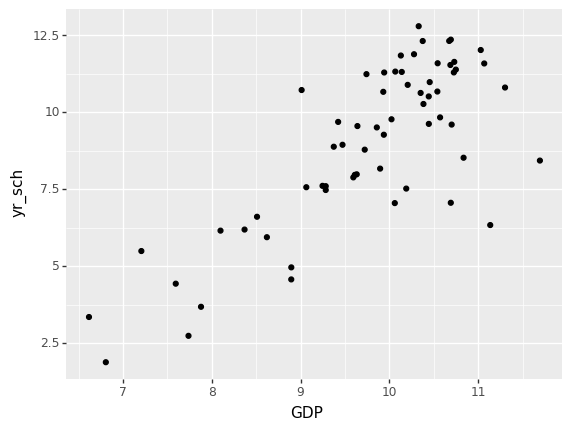

<ggplot: (8772880057873)>

In [111]:
X = result['GDP']
Y = result['yr_sch']
ggplot() + geom_point(aes(x=X, y=Y))

Running the regression between years of schooling and GDP data.

In [112]:
mod3 = smf.ols("yr_sch ~ GDP", data=result)

In [113]:
sch = mod3.fit()
sch.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     95.19
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           4.54e-14
Time:                        18:05:57   Log-Likelihood:                -121.11
No. Observations:                  63   AIC:                             246.2
Df Residuals:                      61   BIC:                             250.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.6471      1.916     -5.035      0.000     -13.478      -5.816
GDP            1.9029      0.195      9.757      0.000       1.513       2.293
==============================================================================
Omnibus:                        8.290   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.612
Skew:                          -0.764   Prob(JB):                       0.0222
Kurtosis:                       3.751   Cond. No.                         89.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding a column that contains the residuals from the previous regression between GDP and schooling years.

In [114]:

result['SCHRES'] = sch.resid
result

,TIMSS,PIRLS,Country,GDP,yr_sch,SCHRES
0,406.652557,431.443542,Argentina,9.857512,9.510379,0.400052
1,454.000000,NaN,Armenia,9.011393,10.726531,3.226247
2,520.000000,534.000000,Australia,10.685550,11.541207,0.855242
3,511.000000,533.000000,Austria,10.699955,9.603404,-1.109974
4,476.978455,392.374207,Burundi,6.617958,3.346481,0.400565
...,...,...,...,...,...,...
58,362.000000,NaN,Tunisia,9.282648,7.475995,-0.540448
59,477.000000,NaN,Turkey,10.059999,7.050123,-2.445508
60,424.912933,450.448608,Uruguay,9.895024,8.171520,-1.010188
61,243.000000,NaN,Yemen,7.878930,3.678734,-1.666633


A merge on country code will provide better results than a merge with Country name, thus we add the column for country codes.

In [115]:
result = pd.merge(result, s[['Country Code','Country']], on = 'Country', how = 'inner')
result

,TIMSS,PIRLS,Country,GDP,yr_sch,SCHRES,Country Code
0,406.652557,431.443542,Argentina,9.857512,9.510379,0.400052,ARG
1,454.000000,NaN,Armenia,9.011393,10.726531,3.226247,ARM
2,520.000000,534.000000,Australia,10.685550,11.541207,0.855242,AUS
3,511.000000,533.000000,Austria,10.699955,9.603404,-1.109974,AUT
4,476.978455,392.374207,Burundi,6.617958,3.346481,0.400565,BDI
...,...,...,...,...,...,...,...
56,NaN,474.000000,Trinidad and Tobago,10.350845,10.632151,0.583081,TTO
57,362.000000,NaN,Tunisia,9.282648,7.475995,-0.540448,TUN
58,477.000000,NaN,Turkey,10.059999,7.050123,-2.445508,TUR
59,424.912933,450.448608,Uruguay,9.895024,8.171520,-1.010188,URY


In [116]:
result.set_index('Country Code', inplace = True)


Adding column with the residuals from the first regression of the first question between PIRLS score and GDP.

In [117]:
result['PIRLSRES'] = pirls.resid
result

,TIMSS,PIRLS,Country,GDP,yr_sch,SCHRES,PIRLSRES
Country Code,,,,,,,
ARG,406.652557,431.443542,Argentina,9.857512,9.510379,0.400052,-44.042720
ARM,454.000000,NaN,Armenia,9.011393,10.726531,3.226247,NaN
AUS,520.000000,534.000000,Australia,10.685550,11.541207,0.855242,22.152588
AUT,511.000000,533.000000,Austria,10.699955,9.603404,-1.109974,20.519995
BDI,476.978455,392.374207,Burundi,6.617958,3.346481,0.400565,59.144563
...,...,...,...,...,...,...,...
TTO,NaN,474.000000,Trinidad and Tobago,10.350845,10.632151,0.583081,-23.149715
TUN,362.000000,NaN,Tunisia,9.282648,7.475995,-0.540448,NaN
TUR,477.000000,NaN,Turkey,10.059999,7.050123,-2.445508,NaN


Adding a column that contains the residuals from the second regression of the first question between TIMSS score and GDP.

In [118]:
result['TIMSSRES'] = timss.resid


Plotting the schooling residuals with the pirls residuals.

/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


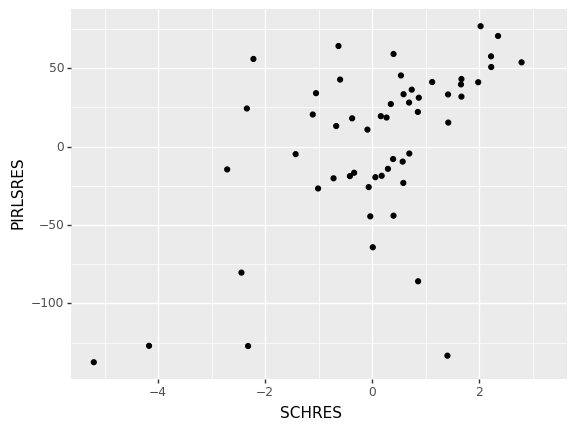

<ggplot: (8772880057781)>

In [119]:
l = result['SCHRES']
o = result['PIRLSRES']
ggplot() + geom_point(aes(x=l, y=o))

Plotting the relationship between the timss residuals and the schooling residuals.

/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


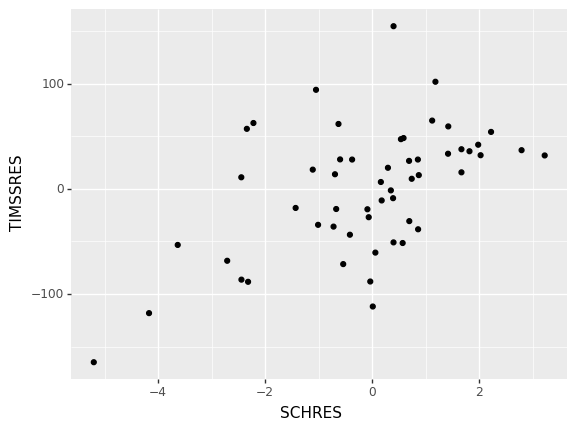

<ggplot: (8772880058149)>

In [120]:
l = result['SCHRES']
o = result['TIMSSRES']
ggplot() + geom_point(aes(x=l, y=o))

Removing nan values in order to run regression.

In [121]:
result.dropna(inplace = True)
result.reset_index(inplace = True, drop = True)

Running a regression between the pirls residuals and the schooling residuals.

In [122]:
mod4 = smf.ols("PIRLSRES ~ SCHRES", data = result)
pirlsandyears = mod4.fit()
pirlsandyears.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PIRLSRES   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     28.67
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           2.80e-06
Time:                        18:06:06   Log-Likelihood:                -239.36
No. Observations:                  47   AIC:                             482.7
Df Residuals:                      45   BIC:                             486.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7638      5.885      0.640      0.526      -8.090      15.617
SCHRES        19.8770      3.712      5.355      0.000      12.401      27.353
==============================================================================
Omnibus:                        1.482   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.477   Jarque-Bera (JB):                0.691
Skew:                          -0.197   Prob(JB):                        0.708
Kurtosis:                       3.444   Cond. No.                         1.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Running a regression between the timss residuals and the schooling residuals.

In [123]:
mod5 = smf.ols("TIMSSRES ~ SCHRES", data = result)
timssandyears = mod5.fit()
timssandyears.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TIMSSRES   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     17.15
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           0.000150
Time:                        18:06:07   Log-Likelihood:                -251.49
No. Observations:                  47   AIC:                             507.0
Df Residuals:                      45   BIC:                             510.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1992      7.618     -0.026      0.979     -15.543      15.145
SCHRES        19.8998      4.805      4.141      0.000      10.222      29.578
==============================================================================
Omnibus:                        6.364   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.194
Skew:                           0.693   Prob(JB):                       0.0745
Kurtosis:                       3.856   Cond. No.                         1.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q3: Compare New and Previous Estimates

Lets read the .dta HLO Panel data that contains the learning outcome estimates from the World Bank, as reported in Altinok, Nadir, Noam Angrist, and Harry Anthony Patrinos, Global Data Set on Education Quality (1965-2015), World Bank Policy Research Working Paper, 2018.

In [39]:
hlo = pd.read_stata('Replication Files/DATA/HLO Panel Data (mean, thresh) - Jan 2018.dta')
hlo



,country,idcntry,cntabb,year,HLO,low_threshold
0,"Abu Dhabi, UAE",7842,ADA,1965,NaN,NaN
1,"Abu Dhabi, UAE",7842,ADA,1970,NaN,NaN
2,"Abu Dhabi, UAE",7842,ADA,1975,NaN,NaN
3,"Abu Dhabi, UAE",7842,ADA,1980,NaN,NaN
4,"Abu Dhabi, UAE",7842,ADA,1985,NaN,NaN
...,...,...,...,...,...,...
1844,Zimbabwe,716,ZWE,1995,NaN,NaN
1845,Zimbabwe,716,ZWE,2000,NaN,NaN
1846,Zimbabwe,716,ZWE,2005,342.98999,48.27
1847,Zimbabwe,716,ZWE,2010,NaN,NaN


Checking for nan values and removing them, reseting index.

In [40]:
hlo.isna().sum()

country             0
idcntry             0
cntabb              0
year                0
HLO              1223
low_threshold    1223
dtype: int64

In [41]:
hlo = hlo[pd.notnull(hlo['HLO'])]
hlo.reset_index(inplace = True, drop = True)
hlo

,country,idcntry,cntabb,year,HLO,low_threshold
0,"Abu Dhabi, UAE",7842,ADA,2010,428.679993,73.830002
1,"Abu Dhabi, UAE",7842,ADA,2015,437.070007,73.750000
2,Albania,8,ALB,2000,400.649994,57.750000
3,Albania,8,ALB,2005,399.320007,60.150002
4,Albania,8,ALB,2010,402.750000,61.320000
...,...,...,...,...,...,...
621,Zambia,894,ZMB,2005,324.459991,27.500000
622,Zanzibar,9834,ZAN,1995,347.700012,17.840000
623,Zanzibar,9834,ZAN,2000,310.540009,34.330002
624,Zanzibar,9834,ZAN,2005,321.880005,38.040001


Picking the latest year for each country, changing column names for readability.

In [42]:
hlo = hlo.sort_values('year', ascending = False).drop_duplicates('country')
hlo = hlo.rename(columns= {'cntabb' : 'Country Code'})
hlo = hlo.rename(columns= {'country' : 'Country'})

hlo

,Country,idcntry,Country Code,year,HLO,low_threshold
443,Northern Ireland,928,NIR,2015,564.280029,95.070000
130,Chinese Taipei,158,TWN,2015,597.750000,97.330002
524,Slovakia,703,SVK,2015,495.320007,85.870003
215,Georgia,268,GEO,2015,459.679993,80.500000
366,Macedonia F.Y.R.,807,MKD,2015,389.000000,58.020000
...,...,...,...,...,...,...
212,Gambia,270,GMB,2000,267.320007,36.529999
58,Bolivia Plurinational State of,68,BOL,1995,370.399994,53.610001
56,Belgium French,5601,BFR,1995,500.390015,93.320000
440,Nigeria,566,NGA,1995,241.179993,45.020000


Creating new dataframe called sptest that is the result of a merge between the country_scores dataframe and the hlo dataframe we just imported. We are only going to need the low_threshold columns of the hlo dataframe.

In [43]:
sptest = pd.merge(country_scores, hlo[['Country Code', 'low_threshold']], on = 'Country Code', how = 'inner')
sptest


,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,low_threshold
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,80.839996
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,70.860001
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,86.129997
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,91.529999
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,88.510002
...,...,...,...,...,...,...,...
72,Turkey,TUR,77.000000,NaN,477.000000,NaN,79.449997
73,Uruguay,URY,57.000000,70.000000,424.912933,450.448608,72.650002
74,United States,USA,96.000000,97.517357,544.000000,560.000000,93.300003
75,Yemen,YEM,9.265388,NaN,243.000000,NaN,40.000000


Plotting the relationship between low_threshold and the Percent Above Reading Benchmark (400 on PIRLS Scale).

/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_text : Removed 12 rows containing missing values.


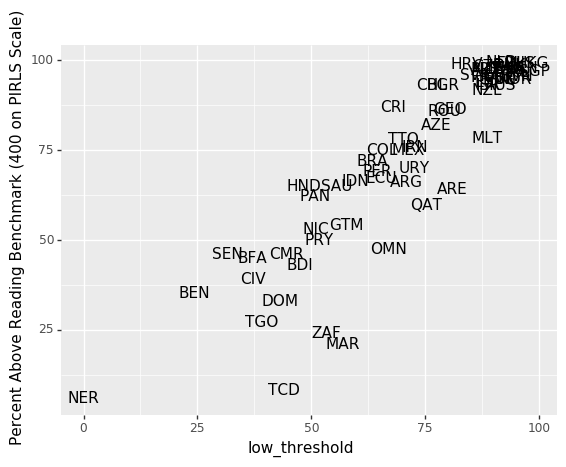

<ggplot: (8772879673761)>

In [44]:
l = sptest['low_threshold']
o = sptest['Percent Above Reading Benchmark (400 on PIRLS Scale)']
ggplot()  + geom_text(aes(label=sptest['Country Code'], x = l , y = o))

Plotting the relationship between low_threshold and the Percent Above Math Benchmark (400 on TIMSS Scale).

/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_text : Removed 8 rows containing missing values.


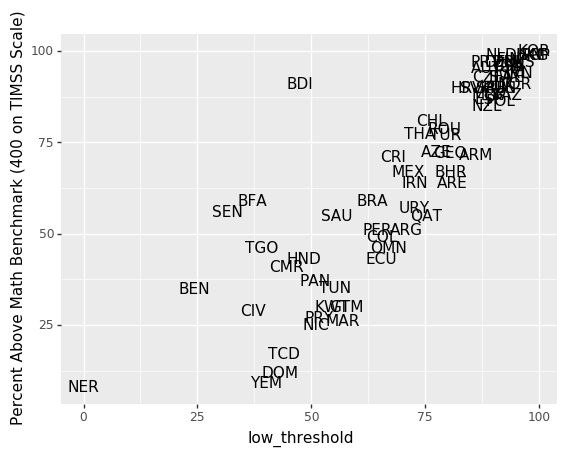

<ggplot: (8772880053677)>

In [45]:
l = sptest['low_threshold']
o = sptest['Percent Above Math Benchmark (400 on TIMSS Scale)']
ggplot()  + geom_text(aes(label=sptest['Country Code'], x = l , y = o))

Dropping nan values in order to apply the spearman test.

In [46]:
sptest.dropna(inplace = True)
sptest.reset_index(inplace = True , drop = True)
sptest.sample()

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,low_threshold
13,Costa Rica,CRI,71.0,87.0,428.064667,477.779877,67.970001


Running spearman test for pirls.

In [47]:
print(stats.spearmanr(sptest['low_threshold'],sptest['Percent Above Reading Benchmark (400 on PIRLS Scale)']))

SpearmanrResult(correlation=0.8998815622555607, pvalue=7.739564321804429e-22)


Running spearman test for timss.

In [48]:
print(stats.spearmanr(sptest['low_threshold'],sptest['Percent Above Math Benchmark (400 on TIMSS Scale)']))

SpearmanrResult(correlation=0.8836530496533562, pvalue=4.1563635470575543e-20)


# Q4: Skills Intensity

Lets import the data that contains high school students and college graduates.

In [49]:
grad = pd.read_csv('rosetta_stone_assignment_data/usa_00001.csv.gz')
grad


,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.0,2000000000014,17,1,1,618.0,8,81,1,10,3130,797
1,2000,200004,1,600.0,2000000000014,17,1,2,684.0,8,81,1,10,7210,467
2,2000,200004,2,600.0,2000000000024,48,1,1,618.0,6,62,1,10,8030,359
3,2000,200004,2,600.0,2000000000024,48,1,2,609.0,6,62,3,30,5240,617
4,2000,200004,2,600.0,2000000000024,48,1,3,621.0,6,62,1,10,9360,877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371613,2000,200004,157985,600.0,2000001579854,12,1,2,606.0,6,62,1,10,4740,708
371614,2000,200004,157985,600.0,2000001579854,12,1,3,494.0,1,10,0,0,9920,0
371615,2000,200004,157986,600.0,2000001579864,6,1,1,556.0,6,62,1,10,7020,337
371616,2000,200004,157986,600.0,2000001579864,6,1,2,600.0,6,65,1,10,130,759


Saving college students to new dataframe called colgrads.

In [50]:
colgrads = grad.loc[grad['EDUC'] >= 10]
colgrads['IND'].shape

(69972,)

Saving high school students to new dataframe called highgrads.

In [51]:
highgrads = grad.loc[grad['EDUC'] >= 6]
highgrads

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.0,2000000000014,17,1,1,618.0,8,81,1,10,3130,797
1,2000,200004,1,600.0,2000000000014,17,1,2,684.0,8,81,1,10,7210,467
2,2000,200004,2,600.0,2000000000024,48,1,1,618.0,6,62,1,10,8030,359
3,2000,200004,2,600.0,2000000000024,48,1,2,609.0,6,62,3,30,5240,617
4,2000,200004,2,600.0,2000000000024,48,1,3,621.0,6,62,1,10,9360,877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371611,2000,200004,157984,500.0,2000001579844,28,1,2,500.0,6,62,3,30,9920,0
371612,2000,200004,157985,600.0,2000001579854,12,1,1,553.0,7,71,1,10,9130,617
371613,2000,200004,157985,600.0,2000001579854,12,1,2,606.0,6,62,1,10,4740,708
371615,2000,200004,157986,600.0,2000001579864,6,1,1,556.0,6,62,1,10,7020,337


Creating a lambda function that calculates weighted average. Running the lambda function as an aggregate function while grouping by industry.

In [52]:
wm = lambda x: np.average(x, weights=highgrads.loc[x.index, "PERNUM"])

highgrads = highgrads.groupby(["IND"]).agg(adjusted_lots=("PERNUM", "sum"),  
                                                      AVGHIGH=("PERWT", wm))
highgrads
                                            

,adjusted_lots,AVGHIGH
IND,,
0,68958,696.738420
17,2139,610.629266
18,1270,617.183465
19,69,571.173913
27,235,776.421277
...,...,...
977,184,772.750000
978,54,582.203704
979,104,647.201923


Repeating the same process for college students.

In [53]:
wm = lambda x: np.average(x, weights=colgrads.loc[x.index, "PERNUM"])

colgrads = colgrads.groupby(["IND"]).agg(adjusted_lots=("PERNUM", "sum"),  
                                                      AVGCOL=("PERWT", wm))
colgrads
                                          

,adjusted_lots,AVGCOL
IND,,
0,12164,664.164748
17,349,558.306590
18,178,591.314607
19,29,486.965517
27,14,771.214286
...,...,...
977,35,673.514286
978,12,470.833333
979,32,652.687500


Resetting index

In [54]:
colgrads.reset_index(inplace = True)
colgrads
highgrads.reset_index(inplace = True)
highgrads

,IND,adjusted_lots,AVGHIGH
0,0,68958,696.738420
1,17,2139,610.629266
2,18,1270,617.183465
3,19,69,571.173913
4,27,235,776.421277
...,...,...,...
261,977,184,772.750000
262,978,54,582.203704
263,979,104,647.201923
264,987,91,643.626374


Now we have weighted averages for both college students and high school students. Lets merge them together into one dataframe called skills_intensity_industry.

In [55]:
colgrads = colgrads.rename(columns= {'PERWT' : 'AVGCOL'})
highgrads = highgrads.rename(columns= {'PERWT' : 'AVGHIGH'})

colgrads

,IND,adjusted_lots,AVGCOL
0,0,12164,664.164748
1,17,349,558.306590
2,18,178,591.314607
3,19,29,486.965517
4,27,14,771.214286
...,...,...,...
260,977,35,673.514286
261,978,12,470.833333
262,979,32,652.687500
263,987,19,620.263158


In [56]:
skills_intensity_industry = pd.merge(highgrads, colgrads[['AVGCOL','IND']], on = 'IND', how = 'inner')
skills_intensity_industry

,IND,adjusted_lots,AVGHIGH,AVGCOL
0,0,68958,696.738420,664.164748
1,17,2139,610.629266,558.306590
2,18,1270,617.183465,591.314607
3,19,69,571.173913,486.965517
4,27,235,776.421277,771.214286
...,...,...,...,...
260,977,184,772.750000,673.514286
261,978,54,582.203704,470.833333
262,979,104,647.201923,652.687500
263,987,91,643.626374,620.263158


Reading the file that contains the weights and the mapping from 2000 industry codes to 1990.

In [57]:
weights = pd.read_stata('Replication Files/DATA/cw_ind2000_ind1990ddx.dta')
weights

,ind2000,ind1990ddx,weight
0,17,10,0.994016
1,17,31,0.002637
2,17,121,0.001740
3,17,561,0.001607
4,18,11,0.990907
...,...,...,...
707,957,922,0.009144
708,957,931,0.983767
709,959,700,0.038986
710,959,910,0.041877


Keeping only the first occurences of each 2000 industry code.

In [58]:
weights = weights.drop_duplicates(subset='ind2000', keep='first')
weights.shape

(257, 3)

In [59]:
weights = weights.rename(columns= {'ind2000' : 'IND'})


In [60]:
weights.reset_index(inplace = True)

Merging skills_intensity_industry dataframe with weights dataframe on 2000 industry codes.

In [61]:
skills_intensity_industry = pd.merge(skills_intensity_industry, weights[['weight','IND','ind1990ddx']], on ='IND', how = 'inner')


Re-weighting our weighted averages for high school students and college students respectively.

In [62]:
skills_intensity_industry['AVGHIGH'] = skills_intensity_industry['AVGHIGH']*skills_intensity_industry['weight']
skills_intensity_industry

,IND,adjusted_lots,AVGHIGH,AVGCOL,weight,ind1990ddx
0,17,2139,606.975083,558.306590,0.994016,10
1,18,1270,611.571216,591.314607,0.990907,11
2,19,69,571.173913,486.965517,1.000000,31
3,27,235,776.421277,771.214286,1.000000,230
4,28,140,712.792857,1073.105263,1.000000,32
...,...,...,...,...,...,...
251,947,5394,17.117951,669.181046,0.023914,870
252,948,1918,3.857207,659.585057,0.005686,471
253,949,625,10.438651,559.863777,0.017814,32
254,957,1661,4.730939,619.535831,0.007089,401


In [63]:
skills_intensity_industry['AVGCOL'] = skills_intensity_industry['AVGCOL']*skills_intensity_industry['weight']
skills_intensity_industry.sample()

,IND,adjusted_lots,AVGHIGH,AVGCOL,weight,ind1990ddx
11,57,1375,689.284364,625.20712,1.0,450


Reading exports data that contains records showing the exports of different countries in different years for different industry sectors.

In [64]:
exports = pd.read_csv("rosetta_stone_assignment_data/BACI_HS17_Y2018_V202001.csv.gz")
exports.sample()

,t,i,j,k,v,q
3244910,2018,381,414,850980,138.174742,7.703966


Lets map the HS 6-digit-code with the rest of our data.

Reading the cw_hs6_sic87dd.dta file.

In [65]:
cw = pd.read_stata("Replication Files/DATA/cw_hs6_sic87dd.dta")
cw.sample()

,hs6,sic87dd,share,weights_method
5348,845959.0,3541.0,1.0,no weights needed


In [66]:
cw = cw.rename(columns= {'hs6' : 'k'})
cw.sample()

,k,sic87dd,share,weights_method
2910,530610.0,2299.0,1.0,no weights needed


Merging exports dataframe with the cw dataframe on k which is the hs 6-digit-code.

In [67]:
exports = pd.merge(exports, cw[['k','sic87dd','share','weights_method']], on = 'k', how = 'inner')
exports.sample()

,t,i,j,k,v,q,sic87dd,share,weights_method
2071411,2018,842,554,820140,43.049616,12.962,3423.0,1.0,no weights needed


Reweighting the value of trade flow with share column.

In [68]:
exports['v'] = exports['v']*exports['share']
exports = exports.rename(columns= {'sic87dd' : 'sic87'})

exports.sample()

,t,i,j,k,v,q,sic87,share,weights_method
2718701,2018,508,528,270112,3.339354,45.579,1221.0,1.0,no weights needed


Grouping by exporter and sic87 industry code. 

In [69]:
exports = exports.groupby(['i','sic87'], as_index = False)['v'].sum()
exports.sample()

,i,sic87,v
14214,180,3561.0,149.01255


Reading the cw_sic87_ind1990ddx.dta file to map the sic87 with the 1990 industry codes.

In [70]:
sic = pd.read_stata("Replication Files/DATA/cw_sic87_ind1990ddx.dta")
sic.sample()

,ind1990ddx,sic87
410,282,3449


Reading the file that contains the mapping between ISO 3-digit country codes to three letter country codes.

In [71]:
codes = pd.read_csv('rosetta_stone_assignment_data/country_codes_V202001.csv.gz', encoding = "ISO-8859-1")

codes = codes.rename(columns= {'country_code' : 'IND'})
codes.sample()

,IND,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
198,762,Tajikistan,Tajikistan,TJ,TJK


Merging exports and sic on sic87 industry code.

In [72]:
exports = exports.rename(columns= {'k':'sic87'})

exports2 = pd.merge(exports, sic[['sic87', 'ind1990ddx']],on = 'sic87', how = 'inner')

exports2.sample()

,i,sic87,v,ind1990ddx
57254,204,3085.0,1.711034,212


In [73]:
exports2 = exports2.rename(columns= {'i' : 'IND'})


Merging exports2 with codes on IND which the exporter 3 digit country code.

In [74]:
exports2 = pd.merge(exports2, codes[['IND','iso_3digit_alpha', ]], on = 'IND', how = 'inner')

exports2.sample()

,IND,sic87,v,ind1990ddx,iso_3digit_alpha
20628,324,2599.0,151.827096,242,GIN


In [75]:
exports2 = exports2.rename(columns= {'iso_3digit_alpha' : 'Country Code'})
exports2.sample()

,IND,sic87,v,ind1990ddx,Country Code
2596,32,3553.0,541.19354,331,ARG


Merging exports2 with skills_intensity_industry on ind1990ddx.

In [76]:
exports2 = pd.merge(exports2, skills_intensity_industry[['ind1990ddx','AVGHIGH','AVGCOL']],on = 'ind1990ddx', how = 'inner' )


Merging exports with exports2 on country code.

In [77]:
exports = pd.merge(country_scores, exports2[['Country Code','v','sic87','IND','ind1990ddx','AVGHIGH','AVGCOL']],on = 'Country Code', how = 'inner' )
exports.sample()

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,v,sic87,IND,ind1990ddx,AVGHIGH,AVGCOL
17912,Japan,JPN,99.0,NaN,588.0,NaN,3284.589423,2371.0,392,151,701.589316,856.696115


We now have the final dataframe called exports ready.
We can apply the four regressions.

First regression, trade flow ~ TIMSS score for college students.

In [78]:
mod3 = smf.ols("np.log(v) ~ np.true_divide(TIMSS,1000) : AVGCOL + ind1990ddx + Country", data=exports)

In [79]:
sch3 = mod3.fit()
sch3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(v)   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     394.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:03:49   Log-Likelihood:                -79527.
No. Observations:               32484   AIC:                         1.592e+05
Df Residuals:                   32412   BIC:                         1.598e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              8.2218      0.128     64.024      0.000       7.970       8.474
Country[T.Armenia]                    -3.1869      0.181    -17.577      0.000      -3.542      -2.832
Country[T.Australia]                   1.7081      0.174      9.793      0.000       1.366       2.050
Country[T.Austria]                     2.4187      0.175     13.854      0.000       2.076       2.761
Country[T.Azerbaijan]                 -3.2784      0.184    -17.801      0.000      -3.639      -2.917
Country[T.Bahrain]                    -1.5790      0.179     -8.815      0.000      -1.930      -1.228
Country[T.Benin]                      -5.8474      0.227    -25.726      0.000      -6.293      -5.402
Country[T.Brazil]                      1.9302      0.174     11.085      0.000       1.589       2.272
Country[T.Bulgaria]                 2.459e-13   2.24e-13      1.098      0.272   -1.93e-13    6.85e-13
Country[T.Burkina Faso]               -5.7108      0.210    -27.171      0.000      -6.123      -5.299
Country[T.Burundi]                    -6.1833      0.263    -23.523      0.000      -6.698      -5.668
Country[T.Cameroon]                   -4.2724      0.191    -22.336      0.000      -4.647      -3.898
Country[T.Canada]                   4.463e-15   2.06e-15      2.166      0.030    4.24e-16     8.5e-15
Country[T.Chad]                       -6.0383      0.267    -22.657      0.000      -6.561      -5.516
Country[T.Chile]                       0.2293      0.175      1.311      0.190      -0.113       0.572
Country[T.Colombia]                   -0.2225      0.175     -1.271      0.204      -0.566       0.121
Country[T.Congo]                      -4.5221      0.207    -21.890      0.000      -4.927      -4.117
Country[T.Costa Rica]                 -1.7624      0.177     -9.977      0.000      -2.109      -1.416
Country[T.Cote d'Ivoire]              -2.6961      0.180    -14.958      0.000      -3.049      -2.343
Country[T.Croatia]                     0.2212      0.175      1.264      0.206      -0.122       0.564
Country[T.Czech Republic]              2.2647      0.174     12.997      0.000       1.923       2.606
Country[T.Denmark]                     1.6941      0.175      9.693      0.000       1.352       2.037
Country[T.Dominican Republic]         -2.5501      0.181    -14.079      0.000      -2.905      -2.195
Country[T.Ecuador]                    -2.2406      0.177    -12.639      0.000      -2.588      -1.893
Country[T.Finland]                     1.0058      0.174      5.769      0.000       0.664       1.348
Country[T.France]                   1.576e-15   1.77e-16      8.897      0.000    1.23e-15    1.92e-15
Country[T.Georgia]                    -3.2662      0.182    -17.981      0.000      -3.622      

Second regression, trade flow ~ TIMSS score for highschool students.

In [80]:
mod4 = smf.ols("np.log(v) ~ np.true_divide(TIMSS,1000) : AVGHIGH + Country + ind1990ddx", data=exports)

In [81]:
sch4 = mod4.fit()
sch4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(v)   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     394.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:03:49   Log-Likelihood:                -79529.
No. Observations:               32484   AIC:                         1.592e+05
Df Residuals:                   32412   BIC:                         1.598e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               8.2163      0.128     63.977      0.000       7.965       8.468
Country[T.Armenia]                     -3.1872      0.181    -17.578      0.000      -3.543      -2.832
Country[T.Australia]                    1.7074      0.174      9.789      0.000       1.365       2.049
Country[T.Austria]                      2.4178      0.175     13.849      0.000       2.076       2.760
Country[T.Azerbaijan]                  -3.2793      0.184    -17.806      0.000      -3.640      -2.918
Country[T.Bahrain]                     -1.5800      0.179     -8.820      0.000      -1.931      -1.229
Country[T.Benin]                       -5.8481      0.227    -25.728      0.000      -6.294      -5.403
Country[T.Brazil]                       1.9304      0.174     11.086      0.000       1.589       2.272
Country[T.Bulgaria]                 -8.093e-13   2.57e-13     -3.148      0.002   -1.31e-12   -3.05e-13
Country[T.Burkina Faso]                -5.7115      0.210    -27.174      0.000      -6.124      -5.300
Country[T.Burundi]                     -6.1848      0.263    -23.528      0.000      -6.700      -5.670
Country[T.Cameroon]                    -4.2728      0.191    -22.338      0.000      -4.648      -3.898
Country[T.Canada]                   -6.692e-14   1.53e-14     -4.362      0.000    -9.7e-14   -3.69e-14
Country[T.Chad]                        -6.0377      0.267    -22.653      0.000      -6.560      -5.515
Country[T.Chile]                        0.2289      0.175      1.309      0.191      -0.114       0.572
Country[T.Colombia]                    -0.2223      0.175     -1.270      0.204      -0.565       0.121
Country[T.Congo]                       -4.5212      0.207    -21.885      0.000      -4.926      -4.116
Country[T.Costa Rica]                  -1.7629      0.177     -9.980      0.000      -2.109      -1.417
Country[T.Cote d'Ivoire]               -2.6960      0.180    -14.956      0.000      -3.049      -2.343
Country[T.Croatia]                      0.2205      0.175      1.260      0.208      -0.123       0.563
Country[T.Czech Republic]               2.2639      0.174     12.992      0.000       1.922       2.605
Country[T.Denmark]                      1.6929      0.175      9.686      0.000       1.350       2.036
Country[T.Dominican Republic]          -2.5497      0.181    -14.076      0.000      -2.905      -2.195
Country[T.Ecuador]                     -2.2406      0.177    -12.638      0.000      -2.588      -1.893
Country[T.Finland]                      1.0048      0.174      5.763      0.000       0.663       1.347
Country[T.France]                    1.644e-15   1.86e-16      8.843      0.000    1.28e-15    2.01e-15
Country[T.Georgia]                     -3.2670      0.182    -17.98

Third regression, trade flow ~ PIRLS score for college students.

In [82]:
mod5 = smf.ols("np.log(v) ~ np.true_divide(PIRLS,1000) : AVGCOL + Country + ind1990ddx", data=exports)

In [83]:
sch5 = mod5.fit()
sch5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(v)   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     409.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:03:50   Log-Likelihood:                -76090.
No. Observations:               31198   AIC:                         1.523e+05
Df Residuals:                   31129   BIC:                         1.529e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              8.2854      0.127     65.002      0.000       8.036       8.535
Country[T.Armenia]                 -2.485e-12   1.86e-13    -13.390      0.000   -2.85e-12   -2.12e-12
Country[T.Australia]                   1.7073      0.173      9.881      0.000       1.369       2.046
Country[T.Austria]                     2.4194      0.173     13.988      0.000       2.080       2.758
Country[T.Azerbaijan]                 -3.2796      0.182    -17.975      0.000      -3.637      -2.922
Country[T.Bahrain]                 -1.051e-14   3.96e-15     -2.652      0.008   -1.83e-14   -2.74e-15
Country[T.Benin]                      -5.8462      0.225    -25.960      0.000      -6.288      -5.405
Country[T.Brazil]                      1.9313      0.173     11.195      0.000       1.593       2.269
Country[T.Bulgaria]                    0.9545      0.173      5.526      0.000       0.616       1.293
Country[T.Burkina Faso]               -5.7172      0.208    -27.455      0.000      -6.125      -5.309
Country[T.Burundi]                    -6.1967      0.260    -23.795      0.000      -6.707      -5.686
Country[T.Cameroon]                   -4.2717      0.190    -22.541      0.000      -4.643      -3.900
Country[T.Canada]                      3.0156      0.172     17.492      0.000       2.678       3.353
Country[T.Chad]                       -6.0324      0.264    -22.844      0.000      -6.550      -5.515
Country[T.Chile]                       0.2335      0.173      1.348      0.178      -0.106       0.573
Country[T.Colombia]                   -0.2169      0.173     -1.250      0.211      -0.557       0.123
Country[T.Congo]                      -4.5180      0.205    -22.074      0.000      -4.919      -4.117
Country[T.Costa Rica]                 -1.7569      0.175    -10.038      0.000      -2.100      -1.414
Country[T.Cote d'Ivoire]              -2.6948      0.179    -15.090      0.000      -3.045      -2.345
Country[T.Croatia]                     0.2279      0.173      1.314      0.189      -0.112       0.568
Country[T.Czech Republic]              2.2671      0.173     13.132      0.000       1.929       2.606
Country[T.Denmark]                     1.6947      0.173      9.787      0.000       1.355       2.034
Country[T.Dominican Republic]         -2.5440      0.179    -14.178      0.000      -2.896      -2.192
Country[T.Ecuador]                    -2.2375      0.176    -12.739      0.000      -2.582      -1.893
Country[T.Finland]                     1.0063      0.173      5.826      0.000       0.668       1.345
Country[T.France]                      3.6573      0.172     21.216      0.000       3.319       3.995
Country[T.Georgia]                    -3.2621      0.180    -18.125      0.000      -3.615      

Fourth regression, trade flow ~ PIRLS score for highschool students.

In [84]:
mod6 = smf.ols("np.log(v) ~ np.true_divide(PIRLS,1000) : AVGHIGH + Country + ind1990ddx", data=exports)

In [85]:
sch6 = mod6.fit()
sch6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(v)   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     409.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:03:50   Log-Likelihood:                -76092.
No. Observations:               31198   AIC:                         1.523e+05
Df Residuals:                   31129   BIC:                         1.529e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               8.2792      0.127     64.948      0.000       8.029       8.529
Country[T.Armenia]                   1.844e-12   1.69e-13     10.891      0.000    1.51e-12    2.18e-12
Country[T.Australia]                    1.7067      0.173      9.876      0.000       1.368       2.045
Country[T.Austria]                      2.4185      0.173     13.982      0.000       2.079       2.758
Country[T.Azerbaijan]                  -3.2805      0.182    -17.978      0.000      -3.638      -2.923
Country[T.Bahrain]                  -1.629e-13   1.67e-14     -9.775      0.000   -1.96e-13    -1.3e-13
Country[T.Benin]                       -5.8467      0.225    -25.961      0.000      -6.288      -5.405
Country[T.Brazil]                       1.9313      0.173     11.194      0.000       1.593       2.270
Country[T.Bulgaria]                     0.9537      0.173      5.522      0.000       0.615       1.292
Country[T.Burkina Faso]                -5.7175      0.208    -27.455      0.000      -6.126      -5.309
Country[T.Burundi]                     -6.1973      0.260    -23.796      0.000      -6.708      -5.687
Country[T.Cameroon]                    -4.2721      0.190    -22.541      0.000      -4.644      -3.901
Country[T.Canada]                       3.0148      0.172     17.486      0.000       2.677       3.353
Country[T.Chad]                        -6.0316      0.264    -22.840      0.000      -6.549      -5.514
Country[T.Chile]                        0.2329      0.173      1.344      0.179      -0.107       0.573
Country[T.Colombia]                    -0.2170      0.173     -1.251      0.211      -0.557       0.123
Country[T.Congo]                       -4.5170      0.205    -22.067      0.000      -4.918      -4.116
Country[T.Costa Rica]                  -1.7577      0.175    -10.043      0.000      -2.101      -1.415
Country[T.Cote d'Ivoire]               -2.6948      0.179    -15.088      0.000      -3.045      -2.345
Country[T.Croatia]                      0.2269      0.173      1.308      0.191      -0.113       0.567
Country[T.Czech Republic]               2.2662      0.173     13.126      0.000       1.928       2.605
Country[T.Denmark]                      1.6935      0.173      9.780      0.000       1.354       2.033
Country[T.Dominican Republic]          -2.5438      0.179    -14.176      0.000      -2.896      -2.192
Country[T.Ecuador]                     -2.2377      0.176    -12.739      0.000      -2.582      -1.893
Country[T.Finland]                      1.0053      0.173      5.819      0.000       0.667       1.344
Country[T.France]                       3.6567      0.172     21.211      0.000       3.319       3.995
Country[T.Georgia]                     -3.2631      0.180    -18.13